<a href="https://colab.research.google.com/github/fedhere/DSPSsolutions/blob/master/HW11/TESSlightcurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part of the homework, you will download 3 time series that were produced by TESS. The format of the data is given in two columns: Time (BJD = Barycentric Julian Date, or days) and differential magnitude (mmag). Each file containing the time series is formatted as 'IDnumber.rw', and there are no headers or column headings (in other words, they are barebones ASCII files).

The three files are available at the following links:

https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

https://drive.google.com/open?id=1q10RiwR20PpBDsWM6MAJY_L9sfrod_N0

https://drive.google.com/open?id=1wQ2zloxuoZ4xfyLLyNSltveOLek4C8-8

Start by loading the data and plotting each of these time series (with proper axes and with the ID number shown for each star).

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle

# **Data ingestion**

SOLUTION: Assuming that you have downloaded the data locally, you would run the following for example:

In [8]:
s1 = pd.read_table("011400909.rw", header=None, names=["time", "flux"], sep=" ")
s2 = pd.read_table("146879345.rw", header=None, names=["time", "flux"], sep=" ")
s3 = pd.read_table("277023834.rw", header=None, names=["time", "flux"], sep=" ")

In [9]:
s3

,time,flux
0,1325.296126,0.022374
1,1325.297515,0.022118
2,1325.298904,0.026386
3,1325.300293,0.013699
4,1325.301682,0.025005
5,1325.303071,0.032613
6,1325.304459,0.024543
7,1325.305848,0.029013
8,1325.307237,0.031122
9,1325.308626,0.028980


# **Plotting each time series**

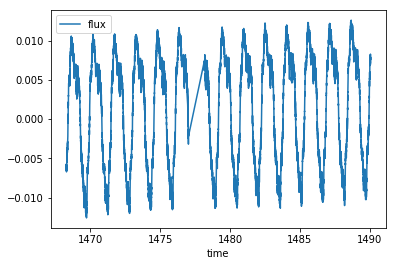

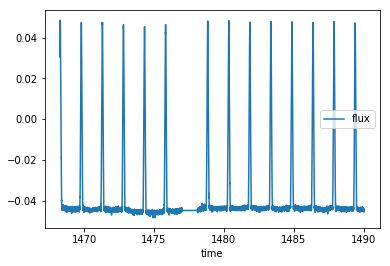

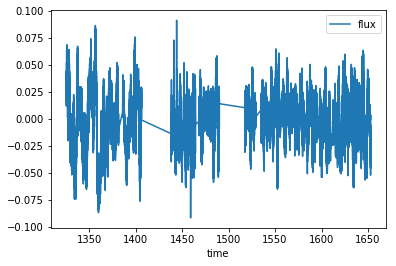

In [10]:
for ts in [s1, s2, s3]:
  ts.plot(x="time", y="flux")

Now that you have plotted each time series, you can probably make an educated guess as to what type of variability (periodic, cyclical or stochastic) is present in each of them. Add a text cell below to put your best "guess" (prediction required for full marks, even if it is wrong or disagrees with answer later in the assignment).

SOLUTION:
011400909.rw: periodic variability
146879345.rw: periodic variability
277023834.rw: stochastic variability

# **Computing Lomb-Scargle periodograms for each time series**

Using the package loaded above (LombScargle), compute the periodogram (either the power spectrum or the amplitude spectrum, as discussed in class) for each time series, and then plot each periodogram, making sure to properly label the axes and to identify each star. Make sure to choose the frequency range wisely.

For more documentation on the LombScargle package: https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle

For the normalization, make sure to use "psd" so that we can recover units.

In [24]:
s1ls = LombScargle(s1.time, s1.flux).autopower(normalization='psd')
s2ls = LombScargle(s2.time, s2.flux).autopower(normalization='psd')
s3ls = LombScargle(s3.time, s3.flux).autopower(normalization='psd')

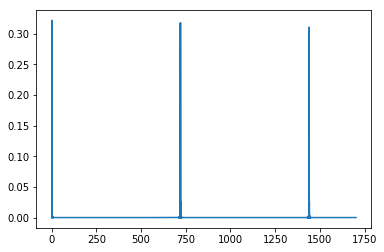

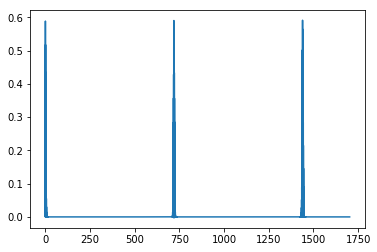

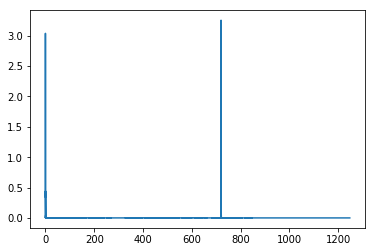

In [25]:
for ts in [s1ls, s2ls, s3ls]:
  plt.figure()
  plt.plot(ts[0], ts[1])
  #plt.xlabel("Frequency (c/d)")
  #plt.ylabel("Power (mmag^2)")
  plt.show()


SOLUTION: 

Note that alternatively, you could have chosen to plot amplitude rather than power on the y-axis. Similarly to the example provided in the lecture pdf, the code would have looked something like this:

ls = LombScargle(s1.time,s1.flux).autopower(normalization='psd')
N = len(s1.flux)
amp = 2*(ls[1]/N)**0.5

However, you'll recall that in class, we talked about the sampling rate and the associated "Nyquist frequency". In this case, a closer look at the data reveals that the sampling rate is one data point roughly every 2 minutes, for a sampling frequency of about 720 c/d, and a corresponding Nyquist frequency that is half that value, or about 360 c/d. Therefore, you should truncate the x-axis accordingly. Alternatively, the LombScargle class also deals with this issue, and you could have instead used the nyquist_factor parameter:

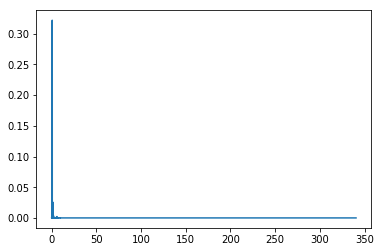

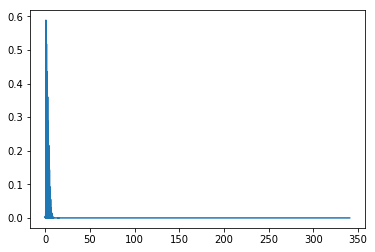

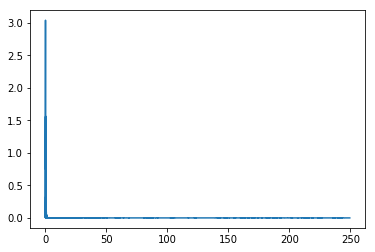

In [26]:
s1ls = LombScargle(s1.time, s1.flux).autopower(normalization='psd', nyquist_factor = 1)
s2ls = LombScargle(s2.time, s2.flux).autopower(normalization='psd', nyquist_factor = 1)
s3ls = LombScargle(s3.time, s3.flux).autopower(normalization='psd', nyquist_factor = 1)

for ts in [s1ls, s2ls, s3ls]:
  plt.figure()
  plt.plot(ts[0], ts[1])
  #plt.xlabel='Frequency (c/d)'
  #plt.ylabel='Power (mmag^2)'
  plt.show()

SOLUTION: At this point, you can see that all the peaks are concentrated towards the lower end of the frequency range. Recalling some of the good data visualization practices shown in class, you would want to restrict the x-axis to a range of values where there is useful data. The exact choice of the range does not matter as long as it seems reasonable. For example, let's see what happens if we put an upper limit of 10 c/d:

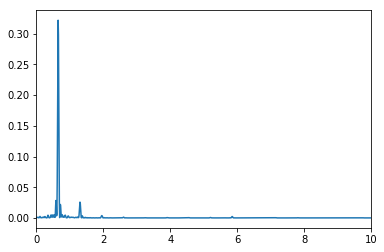

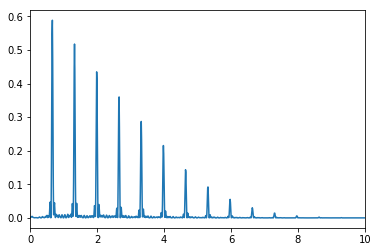

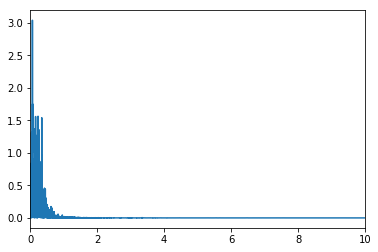

In [28]:
for ts in [s1ls, s2ls, s3ls]:
  plt.figure()
  plt.plot(ts[0], ts[1])
  plt.xlim(0,10)
  #plt.xlabel='Frequency (c/d)'
  #plt.ylabel='Power (mmag^2)'
  plt.show()

SOLUTION: This is obviously a more reasonable range, as most/all of the power seems to disappear before we reach 10 c/d. At this point, it appears pretty clear that the first two time series display periodic variability (with the second periodogram showing many more peaks, as the time series was clearly much more non-sinusoidal than the first one). Let's zoom in one last time to better assess the behavior of the third time series and let's determine the periods for the ones showing periodic variations.

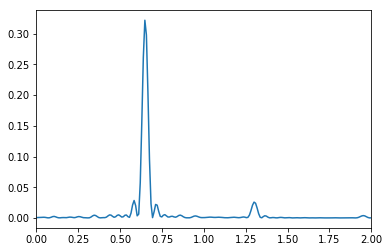

1.5441036284858243


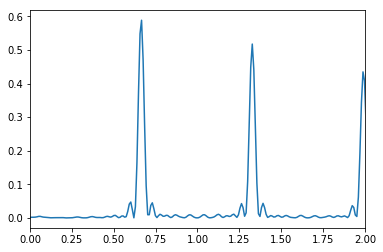

1.5015568389322842


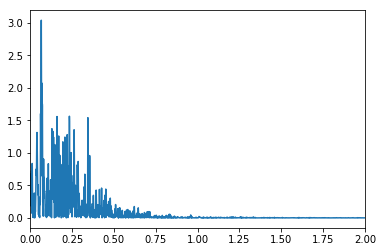

15.096572405916788


In [31]:
for ts in [s1ls, s2ls, s3ls]:
  plt.figure()
  plt.plot(ts[0], ts[1])
  plt.xlim(0,2)
  #plt.xlabel='Frequency (c/d)'
  #plt.ylabel='Power (mmag^2)'
  plt.show()
  print(1./ts[0][np.argmax(ts[1])])

Based on the periodograms you have plotted, add a text box below and indicate what type of variability is exhibited by each of the stars. If one of the stars exhibits *periodic* variations, please also indicate the value of that period.

011400909.rw: periodic variability (P = 1.54 d)
146879345.rw: periodic variability (P = 1.50 d)
277023834.rw: stochastic variability (no obvious periodicity -- you can further convince yourself of this by attempting to phase-fold the time series in the following section)

# **Phase folding**

For any star above exhibiting periodic variations, you will phase-fold their time series. This is accomplished by rescaling the exogenous variable, dividing it by the period (keep in mind that period = 1/frequency, and that if you have multiple periods, or harmonics, you should divide by the fundamental period). However, only the fractional part (e.g. np.modf(x)[0]) of the period must be considered (which means that the axis containing the exogenous variable will no longer be monotonically increasing; therefore, make sure to reorder the dataset appropriately).

Then, plot the phase-folded light curve(s) and identify them accordingly.

In [0]:
dt.time

[1.43938e+03 1.44067e+03 7.19360e+02 7.20660e+02 6.50000e-01]
[1.44064e+03 7.20650e+02 6.70000e-01 7.19320e+02 1.43931e+03]
[7.2007e+02 7.2007e+02 7.0000e-02 7.0000e-02 7.2007e+02]


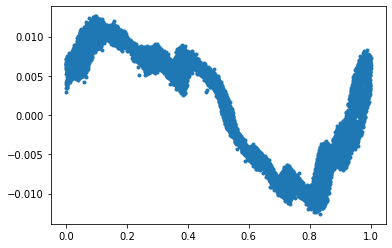

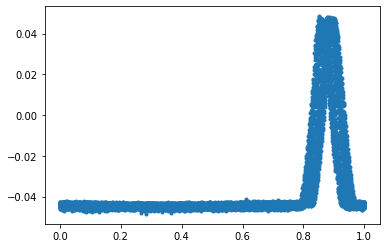

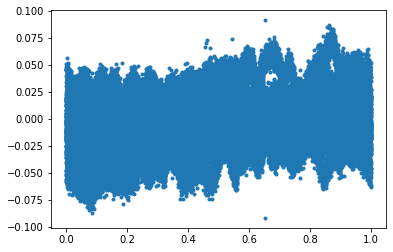

In [0]:
import datetime as dt
for ts,i in [(s1,0), (s2,2), (s3,1)]:
  fs, ps = LombScargle(ts.time, ts.flux,  normalization='psd').autopower()
  fSs = fs[np.argsort(ps)[-5:]]
  print(np.round(fSs, 2))


  mf = fSs[-1-i]
  #print(mf0, mf1, mf2)  # doctest: +FLOAT_CMP
  newx = np.mod((ts.time * mf ), 1)
  #print(newx)    
  xs = np.argsort(newx)
  #print(xs)
  ts['phase'] = newx

  plt.figure()
  plt.plot(newx[xs], ts.flux[xs], '.')


SOLUTION: Clearly, the third phase-folded time series does not look like any coherent variation, confirming our earlier suspicion that its variability is mostly stochastic.

# **Binning**

Finally, you will bin the data so that the phased light curve(s) contains 20 bins (from 0 to 1). To do so, you can use the df.resample() method (or any other method you wish), averaging all the points within each bin. Overplot the binned light curve(s) over the original data using a larger symbol size (and perhaps a different color), and connect the binned points with a line. Are 20 bins appropriate? If not, add more bins and explain why.

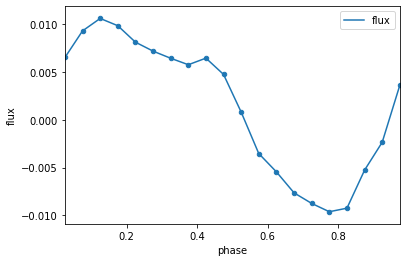

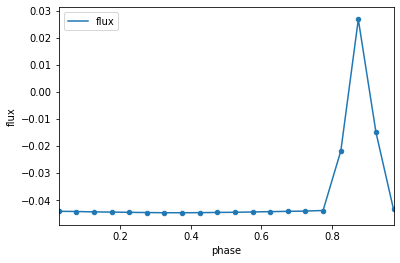

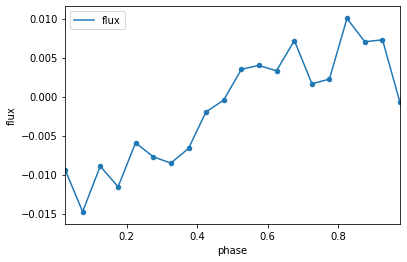

In [0]:
for ts,i in [(s1,0), (s2,2), (s3,1)]:
  ts["ts"] = pd.cut(ts["phase"], bins=20)
  ax = ts.groupby("ts").mean().plot(x="phase", y="flux")
  ts.groupby("ts").mean().plot(x="phase", y="flux", ax=ax, kind="scatter")


For the second time series, we see that the binned version does not sample the peak very well, therefore, it might be useful to use more "bins" (either uniformly sampled, or more densely sampled specifically around the peak).

This concludes the homework assignment!

**Bonus question**: The resulting phase-folded light curve(s) might not be perfectly overlapping, with certain artefacts. Adding a text cell below, comment on what method could help address that issue, and summarily describe how you would go about applying it.

SOLUTION: Instrumental detrending might be required to ensure a better overlap of the phase-folded time series. To perform such detrending, one could attempt to fit it with a low/medium-order polynomial, and then subtract that fit from the full time series. Then, another low-order polynomial could be fit to the residuals to reproduce the long-term variation that add to the periodic signal. Finally, that last fit is subtracted from the full light curve, and the resulting "clean" light curve is phase-folded, revealing a result with less artefacts.

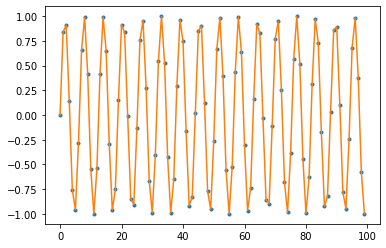

In [0]:
x = np.arange(100)
plt.plot(x, np.sin(x), '.')
plt.plot(x, np.sin(x), '-')

In [0]:
fs, ps = LombScargle(np.arange(100), np.sin(x), dy=None, fit_mean=True, center_data=True, nterms=1, normalization='psd').autopower()

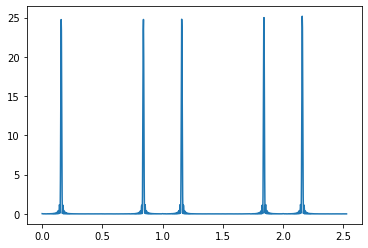

In [0]:
plt.plot(fs, ps)

In [0]:
fSs = fs[np.argsort(ps)[-5:]]
ps[np.argsort(ps)[-5:]], fs[np.argsort(ps)[-5:]], 1./fs[np.argsort(ps)[-5:]] / np.pi

(array([24.74068741, 24.75370632, 24.78525265, 24.99063195, 25.16419285]),
 array([0.15858586, 0.84141414, 1.15858586, 1.84141414, 2.15858586]),
 array([2.00717699, 0.37830347, 0.27474001, 0.17286165, 0.14746223]))

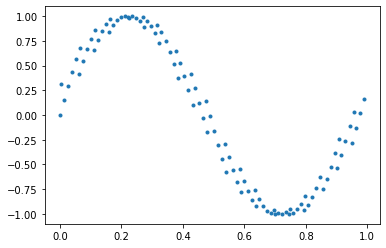

In [0]:
newx = (x * fSs[-1] ) % 1
xs = np.argsort(newx)
#print(xs)

plt.figure()
plt.plot(newx[xs], np.sin(x)[xs], '.')


In [0]:
newx

0         0.000919
1         0.000920
2         0.000920
3         0.000920
4         0.000920
            ...   
163518    0.000502
163519    0.000502
163520    0.000503
163521    0.000503
163522    0.000503
Name: time, Length: 163523, dtype: float64

In [0]:
x, np.mod(x , 1.0 / fSs[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([  0.        ,   6.30573248,  12.61146497,  18.91719745,
         25.22292994,  31.52866242,  37.8343949 ,  44.14012739,
         50.44585987,  56.75159236,  63.05732484,  69.36305732,
         75.66878981,  81.97452229,  88.28025478,  94.58598726,
        100.89171975, 107.19745223, 113.50318471, 119.8089172 ,
        126.11464968, 132.42038217, 138.72611465, 145.03184713,
        151.33757962, 157.6433121 , 163.94904459, 170.25477707,
        176.56050955, 182.86624204, 189.17197452, 195.47770701,
        201.78343949, 208.08917197, 21